# Volcanic eruptions project

The idea of this notebook is not to just do a simplistic EDA, or to develop the best Machine Learning model there is. The idea of this notebook is to dive deep into as much detail as possible. In order to achieve this I will be working in a <font face='Arial' color='red'>curiosity-based manner.
</font>


What would a 'Curiosity-based' way of working look like you might ask. The process is simple. I will start off by doing a very general exploratory analysis: variable types, dataframe size, general statistics and missing values. As I do so, I will inevitably have one or more questions about the outputs that I am seeing. Instead of ignoring the question I will shift my focus to it and try to answer it. As the answer to my question is revealed, another question will appear. And so the cycle will repeat itself until I decide to stop asking questions to the data

A few disclaimer notes on this project:
- This project is just for fun, and there might be a bunch of lines of code that could have been written differently
- The dataset is not the best dataset there is out there. There even was another dataset from Kaggle on volcanic eruptions which was much cleaner than this one. However, I decided to go for the not-so-clean one to challenge myself

I hope you enjoy reading this notebook as much as I have enjoyed creating it. Lets start:

# Importing dependencies

In [1]:
import warnings
warnings.filterwarnings("ignore")
!pip install folium


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/manul/OneDrive/Escritorio/Analytics/volcano-events.csv')

# General EDA on dataset

In [4]:
df.head()

,Year,Month,Day,Name,Location,Country,Latitude,Longitude,Elevation (m),Type,...,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4360.0,NaN,NaN,Macauley,Kermadec Is,New Zealand,-30.210,-178.475,238.0,Caldera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-4350.0,NaN,NaN,Kikai,Ryukyu Is,Japan,30.793,130.305,704.0,Caldera,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0
3,-4050.0,NaN,NaN,Masaya,Nicaragua,Nicaragua,11.985,-86.165,594.0,Caldera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-4000.0,NaN,NaN,Witori,New Britain-SW Pac,Papua New Guinea,-5.576,150.516,724.0,Caldera,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [5]:
df.shape

(877, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                876 non-null    float64
 1   Month                               745 non-null    float64
 2   Day                                 685 non-null    float64
 3   Name                                876 non-null    object 
 4   Location                            876 non-null    object 
 5   Country                             876 non-null    object 
 6   Latitude                            876 non-null    float64
 7   Longitude                           876 non-null    float64
 8   Elevation (m)                       876 non-null    float64
 9   Type                                876 non-null    object 
 10  VEI                                 701 non-null    float64
 11  Agent                               514 non-n

In [7]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Elevation (m),VEI,Deaths,Death Description,Missing,...,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description
count,876.000000,745.000000,685.000000,876.000000,876.000000,876.000000,701.000000,440.000000,568.000000,11.000000,...,462.000000,594.000000,11.000000,14.000000,102.000000,132.000000,26.000000,265.000000,53.000000,149.000000
mean,1730.413242,6.442953,15.274453,15.083737,52.822393,1956.087900,2.864479,441.675000,1.558099,340.090909,...,722.826840,1.612795,340.909091,2.000000,488.039216,1.500000,198.078154,1.784906,1008.396226,2.208054
std,717.583467,3.350458,9.086685,25.722580,101.185489,1257.480788,1.301716,2421.846221,0.966897,642.860864,...,4137.443373,1.003319,642.391696,1.176697,3303.758879,0.860499,425.089307,0.978441,1891.905941,1.060820
min,-4360.000000,1.000000,1.000000,-63.001000,-178.475000,-642.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1799.250000,4.000000,7.000000,-6.729500,-19.666000,1117.000000,2.000000,1.000000,1.000000,2.500000,...,2.000000,1.000000,6.000000,1.000000,3.000000,1.000000,3.673000,1.000000,24.000000,1.000000
50%,1922.000000,7.000000,15.000000,13.257000,110.446000,1718.000000,3.000000,5.000000,1.000000,44.000000,...,6.000000,1.000000,44.000000,1.500000,11.000000,1.000000,19.500000,1.000000,164.000000,2.000000
75%,1986.000000,9.000000,23.000000,36.406000,130.862000,2640.250000,4.000000,48.250000,2.000000,174.500000,...,60.000000,2.000000,174.500000,3.000000,42.750000,2.000000,118.750000,3.000000,800.000000,3.000000
max,2023.000000,12.000000,31.000000,65.715000,177.180000,6377.000000,7.000000,30000.000000,4.000000,1755.000000,...,60000.000000,4.000000,1755.000000,4.000000,31943.000000,4.000000,2000.000000,4.000000,9000.000000,4.000000


In [8]:
# Dropping rows where every single field is a null value since these are virtually worthless
df = df.dropna(axis = 0, how = 'all')

In [9]:
nulls = pd.DataFrame({
    'Number of nulls': df.isnull().sum(),
    'Percentage of nulls': ((df.isnull().sum() / len(df)) * 100)
})
nulls

,Number of nulls,Percentage of nulls
Year,0,0.000000
Month,131,14.954338
Day,191,21.803653
Name,0,0.000000
Location,0,0.000000
Country,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
Elevation (m),0,0.000000
Type,0,0.000000


Given that there are a lot of columns with null values, we will drop the columns that have over 50% of its values missing

In [10]:
cols_to_drop = [column for column, percentage in zip(nulls.index, nulls['Percentage of nulls']) if percentage > 50]
cols_to_drop

['Missing',
 'Missing Description',
 'Injuries',
 'Injuries Description',
 'Damage ($Mil)',
 'Damage Description',
 'Houses Destroyed',
 'Houses Destroyed Description',
 'Total Missing',
 'Total Missing Description',
 'Total Injuries',
 'Total Injuries Description',
 'Total Damage ($Mil)',
 'Total Damage Description',
 'Total Houses Destroyed',
 'Total Houses Destroyed Description']

In [11]:
df.drop(cols_to_drop, axis = 1, inplace = True)

In [12]:
nulls_new = pd.DataFrame({
    'Number of nulls': df.isnull().sum(),
    'Percentage of nulls': ((df.isnull().sum() / len(df)) * 100)
})
nulls_new

,Number of nulls,Percentage of nulls
Year,0,0.000000
Month,131,14.954338
Day,191,21.803653
Name,0,0.000000
Location,0,0.000000
Country,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
Elevation (m),0,0.000000
Type,0,0.000000


There are some columns here that still have a lot of missing values. Lets investigate these

In [13]:
cols_to_investigate = [column for column, percentage in zip(nulls_new.index, nulls_new['Percentage of nulls']) if percentage > 30]
cols_to_investigate

['Agent',
 'Deaths',
 'Death Description',
 'Total Deaths',
 'Total Death Description']

In [14]:
df[cols_to_investigate].describe()

,Deaths,Death Description,Total Deaths,Total Death Description
count,440.000000,568.000000,462.000000,594.000000
mean,441.675000,1.558099,722.826840,1.612795
std,2421.846221,0.966897,4137.443373,1.003319
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000
50%,5.000000,1.000000,6.000000,1.000000
75%,48.250000,2.000000,60.000000,2.000000
max,30000.000000,4.000000,60000.000000,4.000000


#### Upon reading the dataset documentation, we find out the following information:
- Variable 'Death' is the amount of people that died from the volcanic eruption
- Variable 'Total Deaths' is the amount of people that died from the volcanic eruption + secondary effects
- The logic for 'Death' and 'Total Death' description is the same
- Since the 'Description' variables are providing almost the same information as the actual death toll variables and have similar number of missing values we will drop them

In [15]:
df.drop(['Death Description', 'Total Death Description'], axis = 1, inplace = True)

After doing this general EDA on the dataset, the first question popped into my head:

# How many people die from the actual eruption and how many people die from secondary effects on average?

- I would like to check if, for all values where there are no nulls in both columns, there is a major difference in the deaths from the volcano versus the deaths from the volcano + secondary effects
- In order to do so I must first clear the nulls
- Instead of just blindly dropping the nulls I want to check first if there is a correlation in the nulls between both columns. That means, if it is common that whenever there is a null in 'Deaths' there is also a null in 'Total Deaths'. Basically this would be calculating the conditional probability:
- P(null in 'Deaths' | 'Total Deaths' is null) and P(null in 'Total Deaths' | 'Deaths' is null)
- Ideally, we would want high conditional probabilities, meaning that whenever one is null then the other one is also null. This would allow us to confidently drop the null rows without suffering too much information loss

In [16]:
sec_effects = df[['Deaths', 'Total Deaths']]
deaths_only_null = sec_effects.loc[sec_effects['Deaths'].isnull(), :]
total_deaths_only_null = sec_effects.loc[sec_effects['Total Deaths'].isnull(), :]
both_null = sec_effects.loc[(sec_effects['Total Deaths'].isnull()) & (sec_effects['Deaths'].isnull()), :]

print(f"{deaths_only_null.shape[0]} instances out of total {sec_effects.shape[0]} instances where we only have null values for column 'Deaths'")
print(f"{total_deaths_only_null.shape[0]} instances out of total {sec_effects.shape[0]} instances where we only have null values for column 'Total Deaths'")

contingency_table = pd.crosstab(df['Deaths'].isnull(), df['Total Deaths'].isnull(), margins=True, margins_name='Total')

probability_total_deaths_given_deaths_null = contingency_table.loc[True, True] / contingency_table.loc[True, 'Total']
probability_deaths_given_total_deaths_null = contingency_table.loc[True, True] / contingency_table.loc['Total', True]

print(f"Probability of 'Total Deaths' being null given that 'Deaths' is null: {probability_total_deaths_given_deaths_null:.2%}")
print(f"Probability of 'Deaths' being null given that 'Total Deaths' is null: {probability_deaths_given_total_deaths_null:.2%}")


436 instances out of total 876 instances where we only have null values for column 'Deaths'
414 instances out of total 876 instances where we only have null values for column 'Total Deaths'
Probability of 'Total Deaths' being null given that 'Deaths' is null: 94.50%
Probability of 'Deaths' being null given that 'Total Deaths' is null: 99.52%


Luckily for us, there is a very high probability that if one column is null, then the value in the other column is also null

Had we gotten low probabilities, we would have needed to find a way around this because dropping nulls would mean a very significant amount of information loss

In [17]:
sec_effects_clean = sec_effects.dropna(axis = 0)

In [18]:
sec_effects_clean.mean()

Deaths          443.684932
Total Deaths    652.961187
dtype: float64

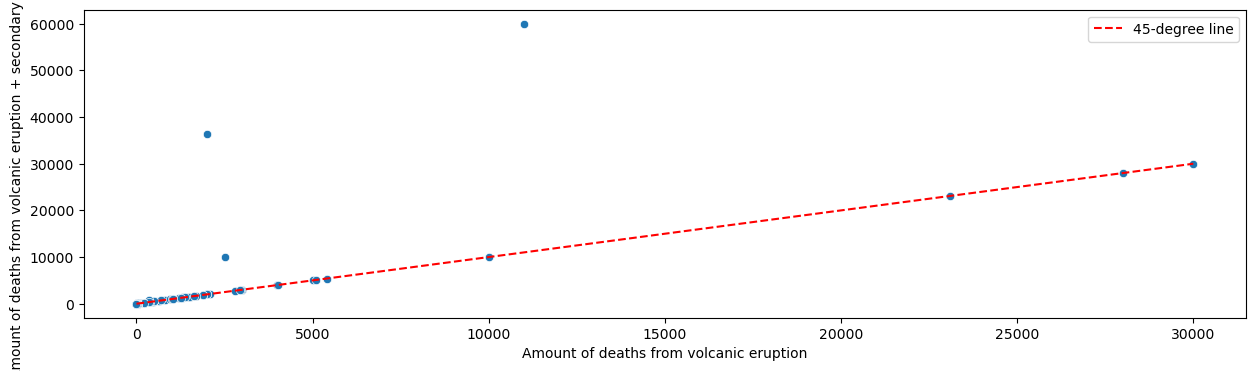

In [19]:
plt.figure(figsize = (15,4))
sns.scatterplot(x = 'Deaths', y = 'Total Deaths', data = sec_effects_clean)
plt.plot([sec_effects_clean['Deaths'].min(), sec_effects_clean['Deaths'].max()], 
         [sec_effects_clean['Deaths'].min(), sec_effects_clean['Deaths'].max()], 
         linestyle='--', color='red', label='45-degree line')
plt.legend()
plt.xlabel('Amount of deaths from volcanic eruption')
plt.ylabel('Amount of deaths from volcanic eruption + secondary effects')

plt.show()

Something very interesting happens here
- If we had focused only on the average values for both variables, then we would have initially thought that secondary effects played a very significant role in the total toll of a volcanic eruption (secondary effects add an extra 50% more deaths)
- However, if we plot a scatter plot between the two variables, we can see that most of the points lie on the 45 degree line
- What this means is that there is almost perfect correlation, and that the secondary effects usually do not kill anyone.
- There are three outliers that have so many deaths from secondary effects that they are pushing the average up, almost tricking us into believing that for most cases secondary effects play a big role in the final death toll of a volcanic eruption
- Basically, what this tells us is that, for the most part, we can utilize either 'Deaths' or 'Total Deaths' as our variable

Before deciding on which variable to use, lets dig even deeper and look at these three outliers where the amount of deaths from secondary effects were significant

# Outlier analysis

In [20]:
sec_deaths_outliers = df.loc[df['Total Deaths'] - df['Deaths'] > 200, :]
sec_deaths_outliers

,Year,Month,Day,Name,Location,Country,Latitude,Longitude,Elevation (m),Type,VEI,Agent,Deaths,Total Deaths
235,1815.0,4.0,10.0,Tambora,Lesser Sunda Is,Indonesia,-8.250,118.000,2850.0,Stratovolcano,7.0,"P,W,A,I",11000.0,60000.0
339,1883.0,8.0,27.0,Krakatau,Indonesia,Indonesia,-6.102,105.423,155.0,Caldera,6.0,"W,P,I",2000.0,36417.0
384,1902.0,10.0,25.0,Santa Maria,Guatemala,Guatemala,14.757,-91.552,3745.0,Stratovolcano,6.0,"T,G",2500.0,10000.0
681,1991.0,6.0,15.0,Pinatubo,Luzon-Philippines,Philippines,15.130,120.350,1486.0,Stratovolcano,6.0,"P,m,I",350.0,800.0


Lets talk a little bit about each of these four catastrophic eruptions:

### Tambora
- The most devastating eruption of the last 2000 years
- Led to what was known as 'The Year without Summer' (1816) as temperatures dropped by an average of 0.5 degrees celsius across the world
- Temperature cooldown translated into colder summers, which resulted in poor harvests. This meant that a lot of people died from famine and diseases
- Volcanic Eruption Index (VEI) of 7 out of 8

### Krakatau
- Produced the largest sound ever recorded (a staggering 310 dB)
- The fourth and final explosion released a rain of hot ash which killed at least 4,000 people
- The huge chunks of pyrochlastic flow which were expelled from the eruption fell into the sea, generating tsunamis of similar masses and significantly increasing the death toll

### Santa Maria
- The third most devastating eruption of the last 200 years
- Left many Guatemalan cities in complete darkness for more than two days
- Pumice flows, ash-rain and pyrochlastic flow, in addition to the poor preparation of the Guatemalan population, greatly increased the final death toll

### Pinatubo
- The second largest eruption of the 20th century
- Produced "The summer that Wasnt" in the US due to the travelling volcanic ash
- The cost to agriculture of eruption effects was estimated to be 1.5 billion pesos

Before moving on to the next question, lets perform some extra preprocessing
 - Drop 'Agent', 'Month' and 'Day' variables as we dont really need them
 - Drop 'Location' as it is basically the same as the 'Country' variable
 - Drop rows where both 'Deaths' and 'Total Deaths' are missing and whenever one is missing and the other is not replace the missing value with the value of the other column


In [21]:
df.drop(['Month', 'Day', 'Agent', 'Location'], axis = 1, inplace = True)

df.dropna(subset=['Deaths', 'Total Deaths'], how='all', inplace=True)
df['Deaths'].fillna(df['Total Deaths'], inplace = True)
df['Total Deaths'].fillna(df['Deaths'], inplace = True)

Lets re-check the amount of missing values in the dataframe now:

In [22]:
(df.isnull().sum()/len(df)) * 100

Year              0.000000
Name              0.000000
Country           0.000000
Latitude          0.000000
Longitude         0.000000
Elevation (m)     0.000000
Type              0.000000
VEI              20.474138
Deaths            0.000000
Total Deaths      0.000000
dtype: float64

Since VEI has around 20% of missing values, one thing we could do is train a Machine Learning model to predict VEI values. This is something that will be done later on in the notebook. For now, lets just focus on uncovering some insights in our data

At this point, after reading the description of each eruption, a second question rised:

# Which type of volcano eruptions (from 'Type') results in higher deaths?

In order to answer this, we will do the following: 
- Given that 'Type' has around 10 different values, we will group all of the values with low frequency under 'Others'

In [23]:
df['Type'].value_counts()

Stratovolcano         312
Complex volcano        61
Caldera                32
Shield volcano         28
Lava dome               7
Pyroclastic shield      6
Fissure vent            3
Submarine volcano       3
Tuff cone               3
Cinder cone             2
Compound volcano        2
Maar                    2
Subglacial volcano      1
Pyroclastic cone        1
Crater rows             1
Name: Type, dtype: int64

In [24]:
others = ['Fissure vent',
       'Subglacial volcano', 'Pyroclastic shield',
       'Lava dome', 'Cinder cone', 'Submarine volcano',
       'Compound volcano', 'Pyroclastic cone', 'Tuff cone', 'Maar',
       'Crater rows']

df['Type'] = np.where(df['Type'].isin(others), 'Others', df['Type'])


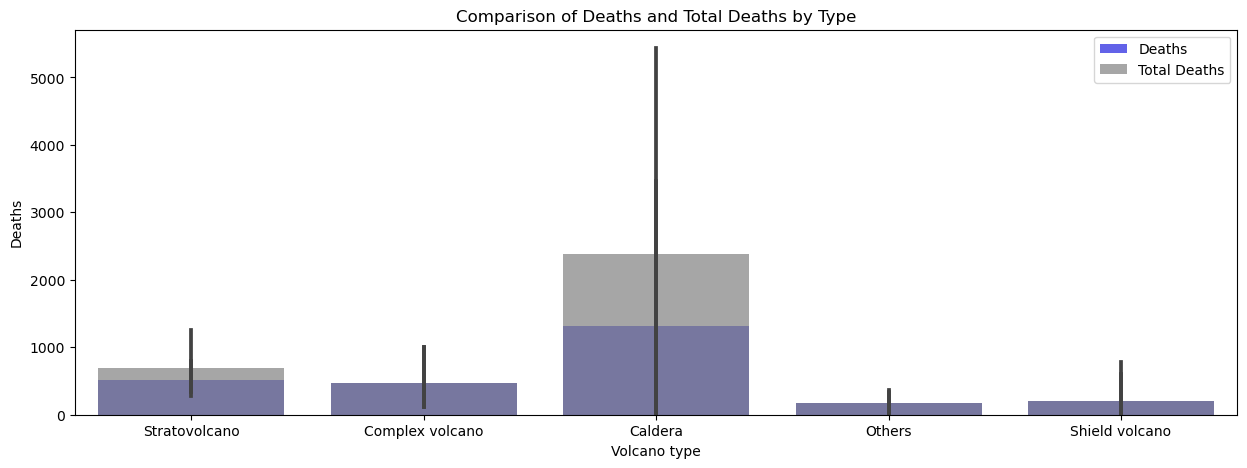

In [25]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x='Type', y='Deaths', color='blue', alpha=0.7, label='Deaths')
sns.barplot(data=df, x='Type', y='Total Deaths', color='grey', alpha=0.7, label='Total Deaths')

plt.legend()
plt.ylabel('Deaths')
plt.xlabel('Volcano type')
plt.title('Comparison of Deaths and Total Deaths by Type')

plt.show()

Lets briefly talk about the types of Volcanos

### Stratovolcanos:
- High and steep volcanos
- The shape is given by the highly viscous lava that flows down from its peak
- Eruptions are usually explosive, and gases flow upwards
- These volcanos usually exhibit multiple eruptions and are dangerous due to their explosiveness and amount of pyroclastic deposits and lava flows
- Mount Fuji in Japan is an example of a Stratovolcano

### Calderas:
- These are formed after volcanic eruptions literally blow the top off the mountain
- These, if they are deemed as 'Explosive' yield the strongest and most explosive volcanic eruptions
- These volcanos exhibit multiple eruptions and are very dangerous if active
- Yellowstone National Park is built on top of the Yellowstone Caldera

### Shield volcanos
- These are very large volcanos, and its shape is that of a shield
- The shape is given by its non-viscous lava that flows from the summit and forms gentle slopes rapidly
- These volcanos are not particularly dangerous given that they usually experience non-explosive eruptions
- Mauna Loa and Kilauea in Hawaii are examples of famous shield volcanos

### Complex volcanos:
- Im gonna be honest here I dont know what 'Complex' volcano means specifically. As of my understanding it is a very broad concept

Having read this information, a new question popped into my head:

# Is there a way to diagnose which would be the most 'dangerous' volcano?
- Bear in mind this question is specifically about volcanos, not eruptions

###### To answer this question we will look at four dimensions:
- Total amount of times each volcano has erupted
- Average VEI value for each eruption
- Median deaths caused by its eruptions (not average due to the fact that there might be outliers in death count due to historical constraints)
- Year of last eruption

In [26]:
volcano_stats = df.groupby('Name').agg({'VEI': 'mean', 'Total Deaths': 'median', 'Year': 'count'})
volcano_stats.rename(columns={'Year': 'Eruptions'}, inplace=True)
volcano_stats['Year of last eruption'] = df.groupby('Name')['Year'].max()

# We will now filter only the volcanos that have erupted 5 or more times
# This is because, given the fact that the dataset spreads over more than 6000 years, less than 5 eruptions could be
# considered to be too few to be considered 'Dangerous' nowadays

more_than_5_eruptions = volcano_stats.loc[volcano_stats['Eruptions'] > 4, :]

As you can see we have four different dimensions that we can look at to assess levels of danger for each volcano that erupted 5 or more times

However, I feel like only looking at one of them has a lot of loss of information.
- For example, what if we saw a volcano which had an average VEI of 5 but very low total deaths? Would that be considered dangerous? (Novarupta eruption in 1912 is a resembling example of this)
- For this reason, I am going to be ambitious and try to construct a 'Danger Index' which considers the three dimensions at the same time

In order to construct the index I will perform the following steps:

1) Scale each variable to a range between 0 and 1 for consistency
2) Manually handle missing values
3) Provide equal weights to each variable given that I consider the four of them to be relevant when assessing danger levels
4) Combine these into a single formula

### Scaling the data

In [27]:
def min_max_scaling(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

scaled_more_than_5_eruptions = min_max_scaling(more_than_5_eruptions)

### Missing values

In [28]:
nulls_danger = more_than_5_eruptions.loc[more_than_5_eruptions['VEI'].isna(), :]
nulls_danger

,VEI,Total Deaths,Eruptions,Year of last eruption
Name,,,,
Hakoneyama,NaN,2.0,5,1972.0
Sinabung,NaN,2.0,5,2016.0


As we can see, both of these volcanos have very low median deaths and only erupted 5 times
- I will drop these two as they are definitely not the most dangerous volcanos in the world

In [29]:
clean_scaled_more_than_5_eruptions = scaled_more_than_5_eruptions.dropna()

### Assigning weights

In [30]:
weight_vei = 0.25
weight_deaths = 0.25
weight_freq = 0.25
weight_year = 0.25

### Create formula

In [31]:
clean_scaled_more_than_5_eruptions['Danger Index'] = (clean_scaled_more_than_5_eruptions['VEI'] * weight_vei +
                                               clean_scaled_more_than_5_eruptions['Total Deaths'] * weight_deaths + 
                                               clean_scaled_more_than_5_eruptions['Eruptions'] * weight_freq + 
                                               clean_scaled_more_than_5_eruptions['Year of last eruption'] * weight_year)


In [32]:
top_4_most_dangerous = clean_scaled_more_than_5_eruptions.sort_values(by = 'Danger Index', ascending = False).head(4)

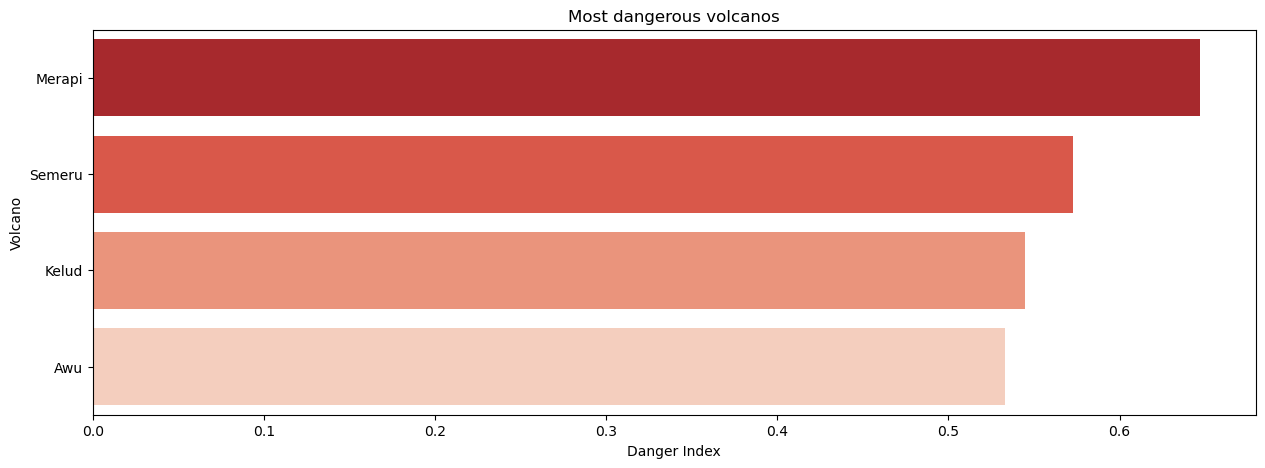

In [33]:
plt.figure(figsize=(15, 5))
sns.barplot(y=top_4_most_dangerous.index, x = 'Danger Index',  data=top_4_most_dangerous, palette = 'Reds_r', dodge = False)
plt.xlabel('Danger Index')
plt.ylabel('Volcano')
plt.title('Most dangerous volcanos')
plt.show()

In [34]:
big_four_list = top_4_most_dangerous.index
big_four_df = more_than_5_eruptions.loc[more_than_5_eruptions.index.isin(big_four_list), :]

In [35]:
scaled_big_four_df = min_max_scaling(big_four_df)

In [36]:
from math import pi
def radar_plot(df):
    """Creates a radar plot using the cluster information in DataFrame"""
    min_val = df.min().min()
    max_val = df.max().max()
    df_plot = df.T
    # number of variables
    categories=df_plot.index.to_list()
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one ax per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks([min_val + (max_val-min_val)*per for per in [.25,.5,.75]],labels=[.25,.5,.75], color="grey", size=7)
    plt.ylim(min_val,max_val)

    # Plot each individual = each line of the data
    n_vars = len(df_plot.columns)
    line_colors = sns.color_palette("pastel", n_colors = n_vars)
    for i, cluster in enumerate(df_plot.columns):
        values = df_plot[cluster].to_list()
        values += values[:1]

        ax.plot(angles, values, linewidth=1, linestyle='solid', label=cluster, color = line_colors[i])
        ax.fill(angles, values, color = line_colors[i], alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

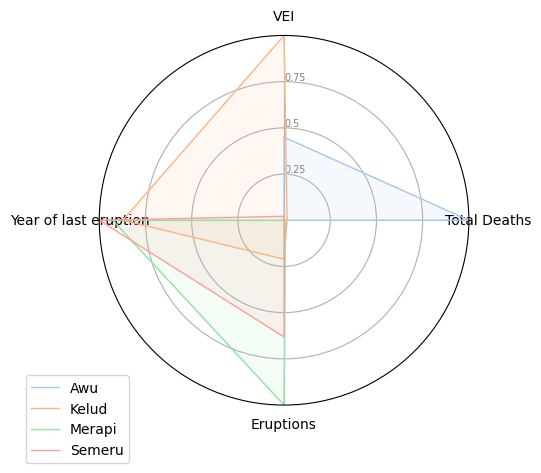

In [37]:
radar_plot(scaled_big_four_df)

Lets look at each volcano individually across the four mentions displayed above:

#### Mount Awu
- Possesses the highest amount of median deaths per eruption with a value of 1242.5
- However, it is the volcano that has erupted the least over the past years, with only 6 eruptions
- Its last eruption happened almost 60 years ago, back in 1966
- The average VEI of its eruptions is of 3

#### Mount Kelud
- Highest average VEI per eruption with 3.6
- 10 total amount of eruptions over the past 6000 years
- Last eruption happened 10 years ago
- Median value of 26.5 deaths per eruption

#### Mount Merapi
- Highest total amount of eruptions with 25 total eruptions
- Last eruption happened in 2017, only 7 years ago
- Median deaths per eruption value of 16
- Average VEI of 2.65

#### Mount Semeru
- Most recent eruption (in 2021)
- Average VEI of 2.66
- Median deaths per eruption: 6
- 18 total eruptions

- Interestingly enough, each of the four volcanos ranks first in a different category
- All in all, our Danger Index yields Mount Merapi as the most dangerous volcano given its high amount of eruptions and the recency in its last eruption
- However, my attention drifted to Mount Awu and its staggering median of 1242.5 total deaths per eruption. This posed the following question:

# Why does Mount Awu kill so many people every time it erupts?

- Given that it does not have the highest average VEI per eruption, the answer is not so obvious
- Yet another thing to consider is that the four volcanos listed above are all located in Indonesia, yet Mount Awu has a significantly higher death toll than the three other volcanos
- Lets have a look at where each of these four volcanos are exactly located within Indonesia

In [38]:
awu_coords = tuple(df.loc[df['Name'] == 'Awu', ['Latitude', 'Longitude']].head(1).values.flatten())
merapi_coords = tuple(df.loc[df['Name'] == 'Merapi', ['Latitude', 'Longitude']].head(1).values.flatten())
semeru_coords = tuple(df.loc[df['Name'] == 'Semeru', ['Latitude', 'Longitude']].head(1).values.flatten())
kelud_coords = tuple(df.loc[df['Name'] == 'Kelud', ['Latitude', 'Longitude']].head(1).values.flatten())

coords = {
    'Awu': awu_coords, 'Merapi': merapi_coords, 'Semeru': semeru_coords,
    'Kelud': kelud_coords
         }

import folium

map_center_indonesia = [-6.2088, 106.8456]  # Latitude and longitude of Jakarta

volcanos = folium.Map(location=map_center_indonesia, zoom_start=5)

# Loop through the dictionary to add markers for each location
for volcano, coords in coords.items():
    latitude, longitude = coords 
    folium.Marker(
        location=[latitude, longitude],
        popup=volcano,
        icon=folium.Icon(color='blue')
    ).add_to(volcanos)

volcanos

We find something interesting here: while Mount Merapi, Mount Kelud and Mount Semeru are located on the island of Java, Mount Awu is located up north on the Sangihe island in the North Sulawesi peninsula
- As we know, the island of Java is one of the main islands in Indonesia given its high population density and vast amount of resources
- On the other side, Sangihe island is not particularly as resourceful as Java
- My hypothesis here is that Sangihe is significantly less prepared for volcanic activity than Java is, therefore each eruption is much more costly in terms of death toll
- If we consider that Mount Awu has erupted the least (6 times) amongst the most dangerous volcanos while Merapi and Semeru have erupted a combined amount of 43 times over the past few years, it makes sense that Java is much more well prepared than Sangihe
- Lets take a deeper look at each Mount Awu eruption

In [39]:
awu = df.loc[df['Name'] == 'Awu', :]
awu['Year'] = pd.to_datetime(awu['Year'], format='%Y')
awu['Year'] = awu['Year'].dt.year

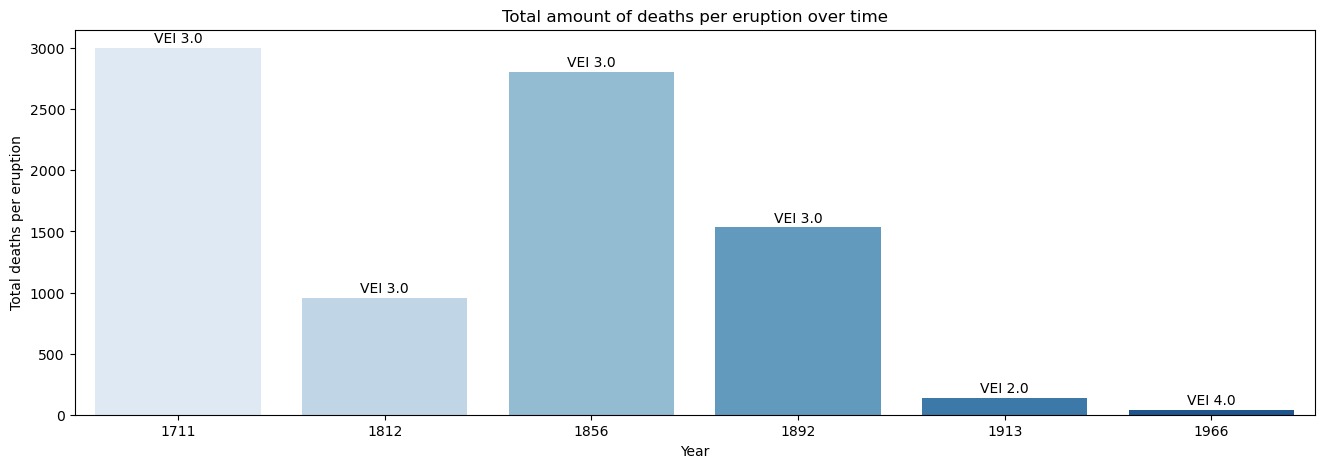

In [40]:
awu['Year'] = pd.to_datetime(awu['Year'], format='%Y')
awu['Year'] = awu['Year'].dt.year

plt.figure(figsize=(16, 5))
ax = sns.barplot(x='Year', y='Total Deaths', data=awu, palette = 'Blues')

for bar, vei in zip(ax.patches, awu['VEI']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, 
            f'VEI {vei}', 
            ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Year')
plt.ylabel('Total deaths per eruption')
plt.title('Total amount of deaths per eruption over time')
plt.show()

- Fortunately for all Sangihe locals looking at this notebook, it seems that they have implemented some measures to diminish the devastating consequences of Mount Awu's eruptions, as total deaths have reduced after more recent eruptions
- It is also worth noting that the last eruption in 1966 had the lowest amount of deaths. On top of that, this last eruption had a VEI of 4. Once again, good job on reducing the impact of the eruption island of Sangihe!

# VEI predictive model

- As we get to the end of the notebook, I would like to go a bit further than just analyzing the data
- Given that about 20% of the VEI values are missing in our dataset, it looks like the stage is set for us to create a Machine Learning model to predict the missing VEI values by training the model on the present 80%
- Disclaimer: since the focus of this notebook is on data analysis, I am not looking to find the best-performing model here. I will be testing out three basic models, each being based on different structures (Logistic Regression: linear model, Decision Tree: tree-based model, Random Forest: ensemble model)
- Once we get the results of these three beforementioned models, we will perform some extra analysis using feature importance and SHAP to determine how each variable affects the result

In [41]:
df_temp1 = df.copy()
df_vei_check = df.copy()

### Preprocessing

In [42]:
df_temp1.head(3)

,Year,Name,Country,Latitude,Longitude,Elevation (m),Type,VEI,Deaths,Total Deaths
24,-141.0,Etna,Italy,37.748,14.999,3357.0,Stratovolcano,NaN,40.0,40.0
30,79.0,Vesuvius,Italy,40.821,14.426,1281.0,Complex volcano,5.0,2100.0,2100.0
36,450.0,Ilopango,El Salvador,13.672,-89.053,450.0,Caldera,6.0,30000.0,30000.0


##### Variables to drop:
- Name: extremely high cardinality
- Country: high cardinality + latitude and longitude variables provide same information
- Deaths: we have to drop one of the 'deaths' variable to avoid the high correlation between them

##### Variables to transform:
- Type: we will encode them using a manual mapping. As we have previously seen, some values appear less than 10 times. We will group those into an 'Other' category

##### Variables to scale:
- Year
- Latitude
- Longitude
- Elevation
- Total deaths

In [43]:
# Dropping variables
df_temp1.drop(['Name', 'Country', 'Deaths'], axis = 1, inplace = True)

In [44]:
# One-hot encoding variables
df_temp1 = pd.get_dummies(df_temp1, columns=['Type'], prefix='Type', drop_first = True)

In [45]:
# Scaling variables
df_temp_scaled = min_max_scaling(df_temp1.drop('VEI', axis = 1))

Then we create our train and test sets

In [46]:
missing_vei_indices = df[df['VEI'].isnull()].index
test_set = df_temp1.loc[missing_vei_indices]
train_set = df_temp1.drop(missing_vei_indices)

Now we assign each set our feature matrix and label matrix

In [47]:
X_train = train_set.drop('VEI', axis = 1)
y_train = train_set['VEI']

X_test = test_set.drop('VEI', axis = 1)
y_test = test_set['VEI']

Lets set up our model

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
missing_vei_indices = df[df['VEI'].isnull()].index
df.loc[missing_vei_indices, 'VEI'] = predictions

- Lets see go back and check the strongest eruptions by VEI

In [50]:
missing_vei_indices = df_vei_check[df_vei_check['VEI'].isna()].index

In [51]:
df.loc[missing_vei_indices][['Name', 'VEI', 'Year']].tail(6)

,Name,VEI,Year
833,Dieng Volcanic Complex,1.0,2017.0
834,Campi Flegrei,2.0,2017.0
836,Merapi,2.0,2017.0
861,Ijen,2.0,2020.0
875,Marapi,2.0,2023.0
876,Reykjanes,3.0,2023.0


- To test if our model is working correctly, lets grab a random eruption which did not have the VEI value before and google its VEI
- For example, our model predicted the Dieng Volcanic Complex 2017 eruption to have a VEI of 1
- Upon research, the Dieng Volcanic Complex eruption was a very minor explosion in Indonesia categorized as a Phreatic eruption. Phreatic eruptions usually have a VEI between 0 and 2

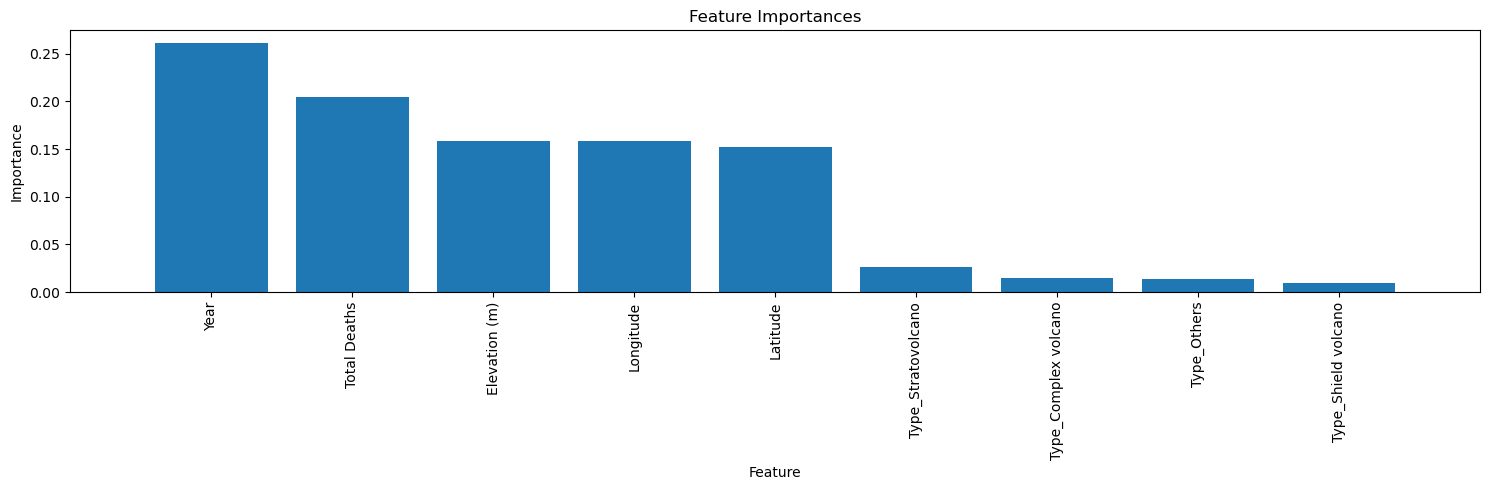

In [52]:
importances = random_forest.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


Something does not feel right here. If we think about this logically these should not have a direct relation at all since the time of the eruption should not influence its strength

Lets try to find the answer for the following question:

# How can the time of the eruption be a good predictor of the VEI?

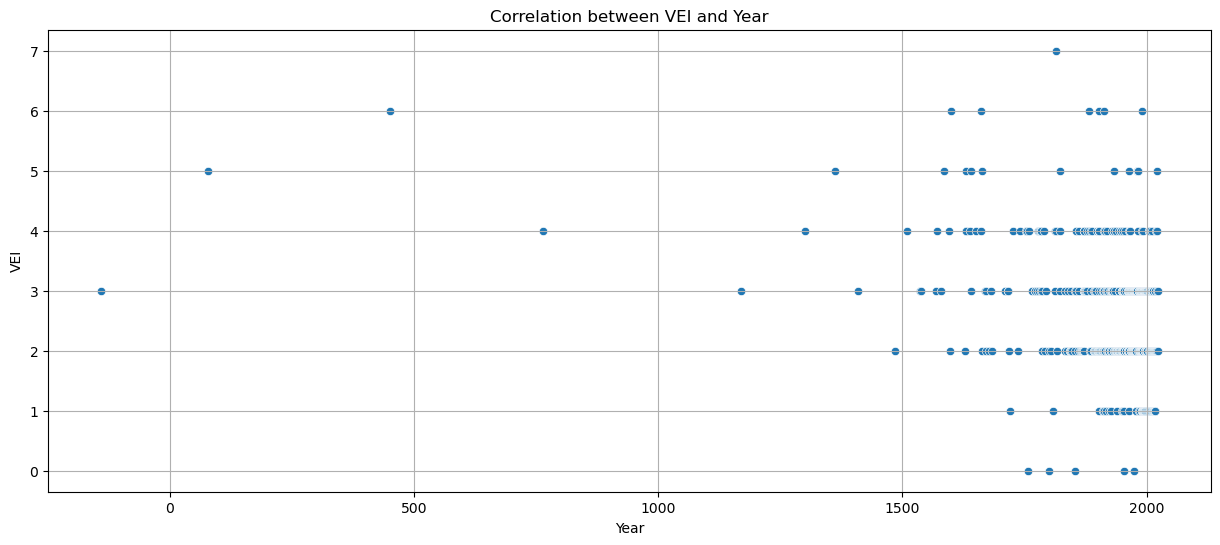

In [53]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Year', y='VEI', data=df)
plt.title('Correlation between VEI and Year')
plt.xlabel('Year')
plt.ylabel('VEI')
plt.grid(True)
plt.show()

In [54]:
correlation_coef = df['Year'].corr(df['VEI'])
print(f'Correlation coefficient between Year of eruption and VEI is {correlation_coef:.2f}')

Correlation coefficient between Year of eruption and VEI is -0.29


- One would think that volcanic eruptions have gotten 'softer' in more recent years if we only looked at the correlation number
- However, if we look at the scatter plot we can see that not only we do not have a lot of data points from the very early years, but also we do not have any volcanic eruption with a VEI below 3
- If we think this through, one VERY likely hypothesis is that historical records as not as precise as nowadays
- It would make sense that, given the amount of time that has passed, it is very difficult to discover that there has been an eruption over 500 years ago. And this especially holds for the eruptions that were not as explosive as the others
- This would solve the mystery of the feature importance graph: when the model identifies an eruption that happened a very long time ago, it is more likely to assign it a higher VEI value because that is the pattern that it has been trained on
- If we were to gather a more precise and voluminous dataset we would probably find that the year of the eruption is not necessarily a good identifier of the VEI

# Conclusion

This marks the end of the notebook

Lets do a recap of the questions that appeared and its answers:

#### How many people die from the actual eruption and how many people die from secondary effects on average?
- Based on this dataset, there are only a handful of eruptions which had a lot of deaths due to secondary effects (Tambora, Krakatau, Santa Maria and Pinatubo)

#### Which type of volcano eruptions (from 'Type') results in higher deaths?
- Calderas first and in second place come the Stratovolcanos

#### Is there a way to diagnose which is the most 'dangerous' volcano?
- After creating our 'Danger index' we came to the conclusion that Mount Merapi is the most dangerous volcano due to its very frequent and recent eruptions

#### Why does Mount Awu kill so many people every time it erupts?
- My hypothesis is that, given its location in Sangihe island in the North Sulawesi Peninsula, the eruptions kill more people due to the island's lack of preparation and resources

#### How can the time of the eruption be a good predictor of the VEI?
- After plotting some graphs, we realize that there are not a lot of recorded eruptions for the earlier years (year 1000 and before), therefore we can deduce that only the very notorious/clear eruptions can be identified today (VEI of 3 or more only as minor eruptions do not leave a significant trace)
- For this reason, whenever the model identifies that the eruption happened a very very long time ago (lets say on year 500), it will probably predict a higher VEI

# Disclaimer/notebook limitations

- As previously mentioned, this is not the cleanest of all datasets. I tried to use this one in order to practice my data preprocessing skills
- I could have tried to perform some sort of mean/median imputation for the rows with missing 'Deaths' and 'Total deaths' values, but given that 50% of the data was missing I felt like that was a very large amount  of missing values to do so
- I could have also done a group-wise mean imputation, but the amount of cases for most of the combinations of variables where less than 10, therefore I did not find it suitable and I decided to just drop all missing values instead
- There are other questions I have regarding the data that I could have asked, but for the sake of this notebook not being too long I decided to just do 5 questions
- As you can tell, I am not putting too much focus on the model (just tested one model only, no hyperparameter tuning, no feature engineering). This is because the main focus of this notebook is on the data analysis part

# Thank you very much for reading, hope you enjoyed!